In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
from profiling import profile, percentage_cpu_time 

In [2]:
chi_values = [chi for chi in range(4, 50, 2)]
profs = [profile(gpu=False, chi=chi, d = 2, max_iter = 1, epochs=1) for chi in chi_values]

100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


In [9]:
print(profs[-1].key_averages().table(sort_by='cpu_time_total', row_limit=10))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                              Optimizer.step#LBFGS.step        14.49%     131.622ms        99.86%     907.293ms     907.293ms      86.910ms         9.56%     907.331ms     907.331ms             1  
                                      aten::_linalg_svd        11.04%     100.348ms        12.30%     111.782ms       5.589ms     108.499ms        11.94%     120.610ms       6.030ms            20  
         

In [3]:
percentages_svd = [percentage_cpu_time(prof, 'aten::linalg_svd') for prof in profs]
percentages_einsum = [percentage_cpu_time(prof, 'aten::einsum') for prof in profs]
percentages_permute = [percentage_cpu_time(prof, 'aten::permute') for prof in profs]
percentages_reshape = [percentage_cpu_time(prof, 'aten::reshape') for prof in profs]

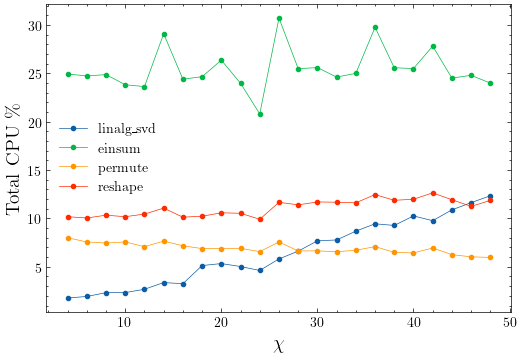

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(chi_values, percentages_svd, 'o-', label='linalg_svd', markersize=3, linewidth=0.5)
plt.plot(chi_values, percentages_einsum, 'o-', label='einsum', markersize=3, linewidth=0.5)
plt.plot(chi_values, percentages_permute, 'o-', label='permute', markersize=3, linewidth=0.5)
plt.plot(chi_values, percentages_reshape, 'o-', label='reshape', markersize=3, linewidth=0.5)
plt.xlabel(r'$\chi$', fontsize=14)
plt.ylabel(r'Total CPU \%', fontsize=14)
plt.legend()
plt.show()